# EDA - Projeto ADA

O presente documento tem por finalidade ser um EDA (Exploratory Data Analysis) como projeto para o curso Técnicas de Programação da ADA. Os dados aqui escolhidos para análise são de caráter público e sua origem é encontrada em: https://www.kaggle.com/datasets/rankirsh/evolution-of-top-games-on-twitch.



## Cabeçalho

Os estudantes responsáveis pelas análises e pelo uso dos dados em questão são:
- Bruno Bastos
- Delson Cardoso
- Luiz Gabriel 
- Igor Raphael 
- Mia Valentin

Todos acima são estudantes da Ada Tech, participantes do programa Data4All, ofertado em parceria com as empresas Gerdau & RandStand.

## EDA

#### Importando Bibliotecas a serem utilizadas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Carregando os dados do arquivo global

In [2]:
data = pd.read_csv('Twitch_global_data.csv')

data.rename(columns={
    'year':'ano',
    'Month':'mes',
    'Hours_watched':'horas_assistidas',
    'Avg_viewers':'media_visualizacoes',
    'Peak_viewers':'pico_de_visualizacoes',
    'Avg_channels':'media_canais',
    'Games_streamed':'jogos_transmitidos',
    'Viewer_ratio':'proporcao_de_espectadores',
}, inplace=True)

data.tail()

,ano,mes,horas_assistidas,media_visualizacoes,pico_de_visualizacoes,Streams,media_canais,jogos_transmitidos,proporcao_de_espectadores
80,2022,9,1817119612,2527287,4678056,22278079,90376,41863,28.37
81,2022,10,1883320673,2534751,4610799,22867973,90557,42164,28.35
82,2022,11,1694262814,2356415,5362892,21744817,88195,41058,26.84
83,2022,12,1674092138,2253152,3866814,21753674,84728,41548,27.00
84,2023,1,1866962462,2512735,5593050,24429476,93349,43611,27.44


#### Entendendo o DataSet

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ano                        85 non-null     int64  
 1   mes                        85 non-null     int64  
 2   horas_assistidas           85 non-null     int64  
 3   media_visualizacoes        85 non-null     int64  
 4   pico_de_visualizacoes      85 non-null     int64  
 5   Streams                    85 non-null     int64  
 6   media_canais               85 non-null     int64  
 7   jogos_transmitidos         85 non-null     int64  
 8   proporcao_de_espectadores  85 non-null     float64
dtypes: float64(1), int64(8)
memory usage: 6.1 KB


In [66]:
data.isnull().sum()

ano                          0
mes                          0
horas_assistidas             0
media_visualizacoes          0
pico_de_visualizacoes        0
Streams                      0
media_canais                 0
jogos_transmitidos           0
proporcao_de_espectadores    0
dtype: int64

<b><i>Não há dados missing e o Dtype de cada dado corresponde ao esperado para análise, sem necessidade de transformações</i></b>

### Carregando os dados do arquivo game

In [67]:
data_games = pd.read_csv('Twitch_game_data.csv', encoding='latin1')
data_games.rename(columns={
    'Game':'jogo',
    'Month':'mes',
    'Year':'ano',
    'Hours_watched':'horas_assistidas',
    'Hours_Streamed':'horas_transmitidas',
    'Peak_viewers':'pico_de_visualizacoes',
    'Peak_channels':'pico_de_canais',
    'Avg_viewers':'media_de_espectadores',
    'Avg_channels':'media_canais',
    'Avg_viewer_ratio':'media_de_proporção_de_espectadores',
}, inplace=True)
data_games.head()

,Rank,jogo,mes,ano,horas_assistidas,horas_transmitidas,pico_de_visualizacoes,pico_de_canais,Streamers,media_de_espectadores,media_canais,media_de_proporção_de_espectadores
0,1,League of Legends,1,2016,94377226,1362044 hours,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105 hours,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397 hours,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903 hours,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578 hours,71639,3620,214054,21740,1549,14.03


In [68]:
data_games.tail()

,Rank,jogo,mes,ano,horas_assistidas,horas_transmitidas,pico_de_visualizacoes,pico_de_canais,Streamers,media_de_espectadores,media_canais,media_de_proporção_de_espectadores
16995,196,Tom Clancy's The Division 2,1,2023,666943(118.3%),97138(59.5%),2759(49.9%),249(48.2%),12805(68.1%),897(118.2%),130(60.5%),6.87(36.9%)
16996,197,Persona 5 Royal,1,2023,664503(-2.9%),68310(2.7%),10494(19.6%),198(4.8%),7475(4.8%),894(-2.9%),91(2.2%),9.73(-5.4%)
16997,198,Bloodborne,1,2023,663078(59.1%),45522(31.8%),9455(30.4%),117(8.3%),8355(27.5%),892(59.3%),61(32.6%),14.57(20.7%)
16998,199,PowerWash Simulator,1,2023,657644(356.0%),18494(53.7%),63757(473.9%),192(346.5%),6589(42.3%),885(356.2%),24(50%),35.56(196.6%)
16999,200,Eternal Return,1,2023,642217(2.4%),24245(7.7%),9933(16.7%),97(15.5%),1997(6.2%),864(2.5%),32(6.7%),26.49(-4.9%)


#### Entendendo o DataSet

In [69]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Rank                                17000 non-null  int64 
 1   jogo                                16999 non-null  object
 2   mes                                 17000 non-null  int64 
 3   ano                                 17000 non-null  int64 
 4   horas_assistidas                    17000 non-null  object
 5   horas_transmitidas                  17000 non-null  object
 6   pico_de_visualizacoes               17000 non-null  object
 7   pico_de_canais                      17000 non-null  object
 8   Streamers                           17000 non-null  object
 9   media_de_espectadores               17000 non-null  object
 10  media_canais                        17000 non-null  object
 11  media_de_proporção_de_espectadores  17000 non-null  ob

<b><i> Algumas classes terão que ser convertidas para numéricos </i></b>


In [70]:
data_games.isnull().sum()

Rank                                  0
jogo                                  1
mes                                   0
ano                                   0
horas_assistidas                      0
horas_transmitidas                    0
pico_de_visualizacoes                 0
pico_de_canais                        0
Streamers                             0
media_de_espectadores                 0
media_canais                          0
media_de_proporção_de_espectadores    0
dtype: int64

<b><i>O único dado missing é categórico (nome do jogo) </i></b>

In [71]:
data_games[data_games['jogo'].isnull()]

,Rank,jogo,mes,ano,horas_assistidas,horas_transmitidas,pico_de_visualizacoes,pico_de_canais,Streamers,media_de_espectadores,media_canais,media_de_proporção_de_espectadores
7561,162,NaN,2,2019,317951,77004 hours,30919,5804,21758,473,114,4.13


<b><i>O jogo está em uma posição do rank que não será analisada, portanto, não há necessidade de tratamento </i></b>

#### Conversão para numéricos

In [72]:
#Limpa os valores que estão entre parênteses e converte para inteiro Ex: 542342(12.0%) String -> [542342 , 12.0%)] list -> 542342 inteiro
data_games['horas_assistidas'] = data_games.loc[:,'horas_assistidas'].str.split('(').apply(lambda lista: lista[0]).astype('int')
data_games['pico_de_visualizacoes'] = data_games.loc[:,'pico_de_visualizacoes'].str.split('(').apply(lambda lista: lista[0]).astype('int')
data_games['pico_de_canais'] = data_games.loc[:,'pico_de_canais'].str.split('(').apply(lambda lista: lista[0]).astype('int')
data_games['Streamers'] = data_games.loc[:,'Streamers'].str.split('(').apply(lambda lista: lista[0]).astype('int')

In [73]:
#Limpa os valores que estão entre parênteses Ex: 542342(12.0%) String -> [542342 , 12.0%)] list -> [542342] string dentro de uma lista
data_games['horas_transmitidas'] = data_games.loc[:, 'horas_transmitidas'].str.split('(').apply(lambda lista: lista[0])
#Verifica valores não numéricos e os retira da string, converte a string restante em inteiro Ex: 231456 hours string -> 231456 string -> 231456 inteiro
data_games['horas_transmitidas'] = data_games['horas_transmitidas'].replace(to_replace=r'[^0-9]', value='', regex=True).astype(int)

In [74]:
#Limpa os valores que estão entre parênteses e converte para float Ex: 470(15.0%) String -> [470 , 15.0%)] list -> 470 float
data_games['media_de_espectadores'] = data_games.loc[:,'media_de_espectadores'].str.split('(').apply(lambda lista: lista[0]).astype('float')
data_games['media_canais'] = data_games.loc[:,'media_canais'].str.split('(').apply(lambda lista: lista[0]).astype('float')
data_games['media_de_proporção_de_espectadores'] = data_games.loc[:,'media_de_proporção_de_espectadores'].str.split('(').apply(lambda lista: lista[0]).astype('float')

In [75]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Rank                                17000 non-null  int64  
 1   jogo                                16999 non-null  object 
 2   mes                                 17000 non-null  int64  
 3   ano                                 17000 non-null  int64  
 4   horas_assistidas                    17000 non-null  int32  
 5   horas_transmitidas                  17000 non-null  int32  
 6   pico_de_visualizacoes               17000 non-null  int32  
 7   pico_de_canais                      17000 non-null  int32  
 8   Streamers                           17000 non-null  int32  
 9   media_de_espectadores               17000 non-null  float64
 10  media_canais                        17000 non-null  float64
 11  media_de_proporção_de_espectadores  17000

In [76]:
data_games.head()

,Rank,jogo,mes,ano,horas_assistidas,horas_transmitidas,pico_de_visualizacoes,pico_de_canais,Streamers,media_de_espectadores,media_canais,media_de_proporção_de_espectadores
0,1,League of Legends,1,2016,94377226,1362044,530270,2903,129172,127021.0,1833.0,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105,372654,2197,120849,64378.0,1117.0,57.62
2,3,Dota 2,1,2016,45185893,433397,315083,1100,44074,60815.0,583.0,104.26
3,4,Hearthstone,1,2016,39936159,235903,131357,517,36170,53749.0,317.0,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578,71639,3620,214054,21740.0,1549.0,14.03


In [77]:
data_games.tail()

,Rank,jogo,mes,ano,horas_assistidas,horas_transmitidas,pico_de_visualizacoes,pico_de_canais,Streamers,media_de_espectadores,media_canais,media_de_proporção_de_espectadores
16995,196,Tom Clancy's The Division 2,1,2023,666943,97138,2759,249,12805,897.0,130.0,6.87
16996,197,Persona 5 Royal,1,2023,664503,68310,10494,198,7475,894.0,91.0,9.73
16997,198,Bloodborne,1,2023,663078,45522,9455,117,8355,892.0,61.0,14.57
16998,199,PowerWash Simulator,1,2023,657644,18494,63757,192,6589,885.0,24.0,35.56
16999,200,Eternal Return,1,2023,642217,24245,9933,97,1997,864.0,32.0,26.49


### Começando Análises

## DELSON

<b><i>Por meio dos códigos acima consegue-se inferir quais são os valores de máximo e mínimo de horas assistidas, os anos e meses respectivos e o total dessas horas.

In [78]:
dados = data['horas_assistidas']

lista = [dado for dado in dados if dado == max(dados)]
lista_1 = [dado for dado in dados if dado == min(dados)]

print(lista_1)

[362833210]


None
AxesSubplot(0.125,0.11;0.775x0.77)
(2021, 5, 2308295297)
(2016, 9, 362833210)
O mês 5 do ano 2021 foi o mês com o maior número de horas assistidas, totalizando 2308295297 horas.
O mês 9 do ano 2016 foi o mês com o menor número de horas assistidas, totalizando 362833210 horas.


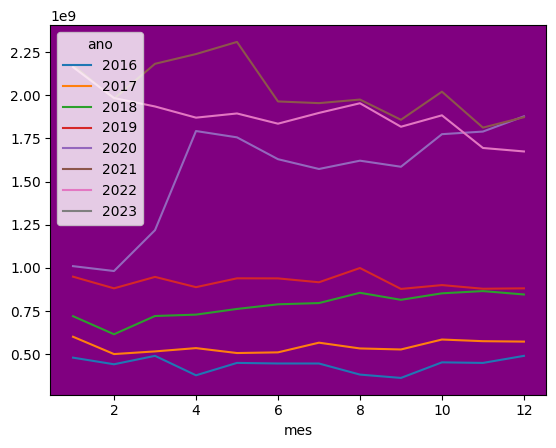

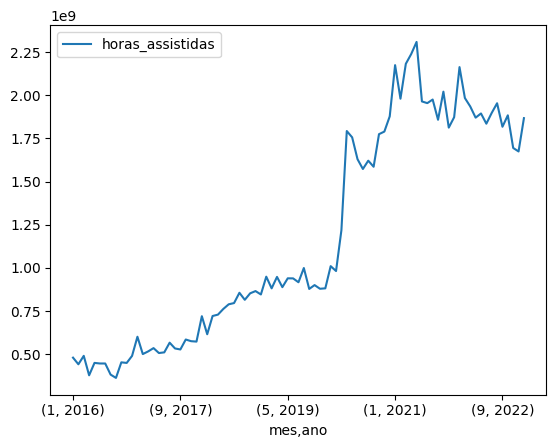

In [3]:
max_horas = data.groupby(['ano','mes','horas_assistidas'])['horas_assistidas'].sum().idxmax()
min_horas = data.groupby(['ano','mes','horas_assistidas'])['horas_assistidas'].sum().idxmin()
print(data.pivot_table(values='horas_assistidas', index='mes',columns='ano').round(0).plot().patch.set_facecolor('purple'))
print(data.pivot_table(values='horas_assistidas', index=['mes','ano']).sort_values(by= ['ano','mes'],ascending=True).plot())
print(max_horas)
print(min_horas)
print(f"O mês {max_horas[1]} do ano {max_horas[0]} foi o mês com o maior número de horas assistidas, totalizando {max_horas[2]} horas.")
print(f"O mês {min_horas[1]} do ano {min_horas[0]} foi o mês com o menor número de horas assistidas, totalizando {min_horas[2]} horas.")

In [4]:
#maior e menor crescimento de horas assistidas durante os meses

diferenca = data['horas_assistidas'].diff()
data['variacao_de_horas'] = diferenca

df = data.sort_values('variacao_de_horas',ascending=False)
# print(df)
df_select = df[['ano','mes','variacao_de_horas']]
print(df_select)
var_max = df.groupby(['ano','mes','variacao_de_horas'])['variacao_de_horas'].sum().idxmax()
var_min = df.groupby(['ano','mes','variacao_de_horas'])['variacao_de_horas'].sum().idxmin()
print(var_max)
print(var_min)


     ano  mes  variacao_de_horas
51  2020    4        573939027.0
60  2021    1        296474851.0
72  2022    1        290046300.0
50  2020    3        236617937.0
62  2021    3        202072109.0
..   ...  ...                ...
82  2022   11       -189057859.0
61  2021    2       -194212207.0
70  2021   11       -208080469.0
65  2021    6       -344665031.0
0   2016    1                NaN

[85 rows x 3 columns]
(2020, 4, 573939027.0)
(2021, 6, -344665031.0)


In [5]:
#maior e menor crescimento percentual durante os meses
horas  = data[['ano','mes','horas_assistidas']]
horas['var_percentual'] = horas['horas_assistidas'].pct_change().fillna(0)
print(horas['var_percentual'])
horas = horas.sort_values('var_percentual',ascending=False)
var_max_porcent = horas.groupby(['ano','mes','var_percentual'])['var_percentual'].sum().idxmax()
var_min_porcent = horas.groupby(['ano','mes','var_percentual'])['var_percentual'].sum().idxmin()
horas
print(var_max_porcent)
print(var_min_porcent)

print(f'''
em abril de {var_max_porcent[0]} temos o maior aumento percentual de horas assistidas
com um aumento de {var_max_porcent[2]:.2%}
''')
print(f'''
em abril de {var_min_porcent[0]} temos a maior redução  percentual de horas assistidas
com uma redução de {var_min_porcent[2]:.2%}
''')

0     0.000000
1    -0.079922
2     0.110464
3    -0.229674
4     0.190121
        ...   
80   -0.069663
81    0.036432
82   -0.100385
83   -0.011905
84    0.115209
Name: var_percentual, Length: 85, dtype: float64
(2020, 4, 0.47107117418179945)
(2016, 4, -0.2296737520823291)

em abril de 2020 temos o maior aumento percentual de horas assistidas
com um aumento de 47.11%


em abril de 2016 temos a maior redução  percentual de horas assistidas
com uma redução de -22.97%



C:\Users\Delson Cardoso\AppData\Local\Temp\ipykernel_12156\937122323.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  horas['var_percentual'] = horas['horas_assistidas'].pct_change().fillna(0)


In [6]:
media_transmicoes =data.pivot_table(values='Streams', index ='mes',aggfunc='mean',).round(0)
media_transmicoes.sort_values(by='Streams',ascending=False)

,Streams
mes,
1,17165910.0
3,16092204.0
5,15810690.0
7,15768544.0
8,15693955.0
12,15551058.0
4,15306593.0
6,14912642.0
10,14894164.0


In [7]:
diff = media_transmicoes.loc[1, 'Streams'] - media_transmicoes.loc[12, 'Streams']
diferenca_de_medias = media_transmicoes.diff().fillna(diff)
diferenca_de_medias.sort_values(by='Streams',ascending=False)
#ou seja, de dezembro para janeiro a média de visualizações aumenta em 1614852 vizualizações

,Streams
mes,
1,1614852.0
3,1363965.0
12,1078144.0
7,855902.0
5,504097.0
10,320877.0
8,-74589.0
11,-421250.0
4,-785611.0


In [8]:
#Ranking dos meses com maior média de transmissões
media_transmicoes.sort_values(by= 'Streams',ascending=False)


,Streams
mes,
1,17165910.0
3,16092204.0
5,15810690.0
7,15768544.0
8,15693955.0
12,15551058.0
4,15306593.0
6,14912642.0
10,14894164.0


## LUIZ

### Maior e menor média de horas assistidas por visualização. Valores anuais e mensais. 

In [79]:
maior_horas = data.groupby(['ano', 'mes', 'horas_assistidas', 'media_visualizacoes'])['horas_assistidas'].sum().idxmax()
menor_horas = data.groupby(['ano', 'mes', 'horas_assistidas', 'media_visualizacoes'])['horas_assistidas'].sum().idxmin()

maior_horas, menor_horas

((2021, 5, 2308295297, 3106723), (2016, 9, 362833210, 504635))

In [80]:
print(f'A maior média de horas assistidas por visualizações foi de {maior_horas[2] / maior_horas[-1]:.2f}')
print(f'A menor média de horas assistidas por visualizações foi de {menor_horas[2] / menor_horas[-1]:.2f}')

A maior média de horas assistidas por visualizações foi de 743.00
A menor média de horas assistidas por visualizações foi de 719.00


Os trechos acima permitem compreender que, na data 05/2021 ocorreu o maior número bruto de horas assistidas 2308295297 com um total de 3106723 médias visualizações. Já o menor valor de horas assistidas ocorreu em 09/2016, com um número bruto de 362833210 horas assistidas e um total de 504635 média visualizações. <br>
A maior média horas / visus foi de 743 horas por média visualização, já o menor valor foi de 719 horas por média visualização.

In [81]:
def analisaMedias(horas:list(), visus:list()):
    aux = []
    total = []
    ano = 2016
    for x in range(85):
        if x < 12:
            aux.append(horas[x] / visus[x])
            if x == 11:
                aux.append(sum(horas[0:12]) / sum(visus[0:12]))
                aux.insert(0, ano)
                total.append(aux[:])
                aux.clear()
        elif 24 > x > 11:
            aux.append(horas[x] / visus[x])
            if x == 23:
                aux.append(sum(horas[11:24]) / sum(visus[11:24]))
                aux.insert(0, ano + 1)
                total.append(aux[:])
                aux.clear()
        elif 36 > x > 23:
            aux.append(horas[x] / visus[x])
            if x == 35:
                aux.append(sum(horas[24:36]) / sum(visus[24:36]))
                aux.insert(0, ano + 2)
                total.append(aux[:])
                aux.clear()
        elif 48 > x > 35:
            aux.append(horas[x] / visus[x])
            if x == 47:
                aux.append(sum(horas[36:48]) / sum(visus[36:48]))
                aux.insert(0, ano + 3)
                total.append(aux[:])
                aux.clear()
        elif 60 > x > 47:
            aux.append(horas[x] / visus[x])
            if x == 59:
                aux.append(sum(horas[48:60]) / sum(visus[48:60]))
                aux.insert(0, ano + 4)
                total.append(aux[:])
                aux.clear()         
        elif 72 > x > 59:
            aux.append(horas[x] / visus[x])
            if x == 71:
                aux.append(sum(horas[60:72]) / sum(visus[60:72]))
                aux.insert(0, ano + 5) 
                total.append(aux[:])
                aux.clear()
        elif 84 > x > 71:
            aux.append(horas[x] / visus[x])
            if x == 83:
                aux.append(sum(horas[72:84]) / sum(visus[72:84]))
                aux.insert(0, ano + 6)
                total.append(aux[:])
                aux.clear()       
        else:
            aux.append(horas[x] / visus[x])
            if x == 84:
                aux.append((horas[-1]) / (visus[-1]))
                aux.insert(0, ano + 7)
                total.append(aux[:])
                aux.clear()
    return total

In [82]:
horas_assistidas = [ dados for dados in data['horas_assistidas']]
media_visualizacoes = [dados for dados in data['media_visualizacoes']]

total_medias = analisaMedias(horas_assistidas, media_visualizacoes)

A variável <b>total_medias</b> corresponde a uma lista com outras 8 listas dentro de si. Cada lista dessas possui 1 determinado ano como valor inicial, 12 ou (1) valores de médias mensais de horas assistidas por número de espectadores e, por fim, um valor de média anual do total de horas assistidas pelo total de espectadores anuais.

In [83]:
maiores = []
minimos = []

for x in total_medias:
    maiores.append(f'O maior valor médio de horas por visus do ano {x[0]} é {max(x[1:-1]):.2f} no mês {x.index(max(x[1:-1]))}')
    minimos.append(f'O menor valor médio de horas por visus do ano {x[0]} é {min(x[1:-1]):.2f} no mês {x.index(min(x[1:-1]))}')
    
maiores, minimos

(['O maior valor médio de horas por visus do ano 2016 é 743.00 no mês 8',
  'O maior valor médio de horas por visus do ano 2017 é 743.00 no mês 1',
  'O maior valor médio de horas por visus do ano 2018 é 743.00 no mês 5',
  'O maior valor médio de horas por visus do ano 2019 é 743.00 no mês 3',
  'O maior valor médio de horas por visus do ano 2020 é 743.00 no mês 1',
  'O maior valor médio de horas por visus do ano 2021 é 743.00 no mês 8',
  'O maior valor médio de horas por visus do ano 2022 é 743.00 no mês 10',
  'O maior valor médio de horas por visus do ano 2023 é 743.00 no mês 1'],
 ['O menor valor médio de horas por visus do ano 2016 é 695.00 no mês 2',
  'O menor valor médio de horas por visus do ano 2017 é 671.00 no mês 2',
  'O menor valor médio de horas por visus do ano 2018 é 671.00 no mês 2',
  'O menor valor médio de horas por visus do ano 2019 é 671.00 no mês 2',
  'O menor valor médio de horas por visus do ano 2020 é 695.00 no mês 2',
  'O menor valor médio de horas por 

In [84]:
for x in range(8):
    print(f'O valor de média HA/MV anual de {total_medias[x][0]} é de {total_medias[x][-1]:.2f}')

O valor de média HA/MV anual de 2016 é de 731.19
O valor de média HA/MV anual de 2017 é de 729.96
O valor de média HA/MV anual de 2018 é de 729.54
O valor de média HA/MV anual de 2019 é de 728.81
O valor de média HA/MV anual de 2020 é de 731.42
O valor de média HA/MV anual de 2021 é de 728.77
O valor de média HA/MV anual de 2022 é de 728.38
O valor de média HA/MV anual de 2023 é de 743.00


In [85]:
for value in total_medias:
    print(f'O ano é {value[0]}')
    for index, values in enumerate(value):
        if 13 > index >= 1:
            print(f'O valor médio mensal {index} é {values:.2f} HA/MV')
            

O ano é 2016
O valor médio mensal 1 é 743.00 HA/MV
O valor médio mensal 2 é 695.00 HA/MV
O valor médio mensal 3 é 743.00 HA/MV
O valor médio mensal 4 é 719.00 HA/MV
O valor médio mensal 5 é 743.00 HA/MV
O valor médio mensal 6 é 719.00 HA/MV
O valor médio mensal 7 é 743.00 HA/MV
O valor médio mensal 8 é 743.00 HA/MV
O valor médio mensal 9 é 719.00 HA/MV
O valor médio mensal 10 é 743.00 HA/MV
O valor médio mensal 11 é 719.00 HA/MV
O valor médio mensal 12 é 743.00 HA/MV
O ano é 2017
O valor médio mensal 1 é 743.00 HA/MV
O valor médio mensal 2 é 671.00 HA/MV
O valor médio mensal 3 é 743.00 HA/MV
O valor médio mensal 4 é 719.00 HA/MV
O valor médio mensal 5 é 743.00 HA/MV
O valor médio mensal 6 é 719.00 HA/MV
O valor médio mensal 7 é 743.00 HA/MV
O valor médio mensal 8 é 743.00 HA/MV
O valor médio mensal 9 é 719.00 HA/MV
O valor médio mensal 10 é 743.00 HA/MV
O valor médio mensal 11 é 719.00 HA/MV
O valor médio mensal 12 é 743.00 HA/MV
O ano é 2018
O valor médio mensal 1 é 743.00 HA/MV
O val

<b><i> O que se pode perceber após analisar todo o panorama geral do dataset é que as médias tendem a se manter iguais por meses e até mesmos anos. A variação anual não é tão significativa (considerando que 2023 está com 11 meses faltantes). É como se os dados da Twitch fossem estáveis, com poucas variações em perídos de (1) campeonatos famosos, (2) estreias de jogos famosos e (3) período de pandemia.

### Meses de máxima, mínima e possíveis recorrências

In [86]:
for num in range(2016, 2023):
    print(data[data['ano'] == num].groupby(['ano', 'mes', 'horas_assistidas'])['horas_assistidas'].sum().idxmax())

(2016, 3, 490669308)
(2017, 1, 601251200)
(2018, 11, 865630693)
(2019, 8, 999177398)
(2020, 12, 1877319317)
(2021, 5, 2308295297)
(2022, 1, 2162446961)


In [87]:
for num in range(2016, 2023):
    print(data[data['ano'] == num].groupby(['ano', 'mes', 'horas_assistidas'])['horas_assistidas'].sum().idxmin())

(2016, 9, 362833210)
(2017, 2, 500932308)
(2018, 2, 615710441)
(2019, 9, 878083331)
(2020, 2, 981752149)
(2021, 11, 1812117484)
(2022, 12, 1674092138)


<b><i>Não chega a existir uma recorrência de ano para ano. Os valores de máxima se dão em períodos de lançamentos de jogos e/ou campeonatos. Há a questão ainda de começo, meio e fim da pandemia para explicar uma grande alta de horas assistidas, porém, faltam dados para comprovar que a mudança foi de fato a pandemia.

### Proporção de Espectadores

In [88]:
for x in range(2016, 2023):
    print(f'O ano é {x}')
    print(data[data['ano'] == x].groupby(['media_canais', 'proporcao_de_espectadores'])['proporcao_de_espectadores'].idxmax())

O ano é 2016
media_canais  proporcao_de_espectadores
16592         28.47                         7
16791         28.80                         3
16880         28.39                         8
18030         28.62                         6
18818         28.76                         5
19250         28.33                         9
19394         28.85                         4
20076         29.08                         0
20271         28.92                         2
20427         28.98                         1
20715         28.22                        10
22291         28.13                        11
Name: proporcao_de_espectadores, dtype: int64
O ano é 2017
media_canais  proporcao_de_espectadores
22078         27.60                        15
22362         27.33                        16
23094         27.73                        14
23412         27.18                        17
24081         28.07                        12
24219         27.85                        13
24711         26.89 

In [89]:
pro = [dado for dado in data['proporcao_de_espectadores']]
canais = [canal for canal in data['media_canais']]

In [90]:
aux_pro = pro[0]
aux_canais = canais[0]

for x in range(84):
    if x == 0:
        print((pro[x] >= aux_pro), (canais[x] >= aux_canais))
    else:
        print((pro[x] > aux_pro), (canais[x] > aux_canais))
    aux_pro = pro[x]
    aux_canais = canais[x]

True True
False True
False False
False False
True True
False False
False False
False False
False True
False True
False True
False True
False True
False True
False False
False False
False True
False True
False True
False False
False True
False True
False True
False True
False True
False True
False True
True True
False False
False True
False True
False True
False False
False False
False True
False True
True True
True True
True False
True False
True False
True False
False True
True True
False False
True False
True True
False True
False True
True True
False True
True True
False True
True False
False True
True True
True False
True True
False True
True True
True True
False True
True False
True False
True False
False False
False False
True False
True False
True False
False False
True False
True True
True True
False False
True False
True False
False True
False True
True False
False False
False True
False False
True False


<b><i>A interpretação dos dados acima permite compreender que não necessariamente o aumento da variável media_canais proporciona um aumento na variável media_espectadores. A variável media_espectadores seguiu-se padrão tal qual horas_assistidas, tendo aumento nos perídoso de alta no geral (campeonatos, lançamentos de jogos e pandemia), porém, no restante, não houve tanta variação.</i></b>

### Horas asssistidas por Jogos Transmitidos

In [91]:
for x in range(2016, 2023):
    print(data[data['ano'] == x].groupby(['ano', 'mes', 'horas_assistidas'])['jogos_transmitidos'].sum())

ano   mes  horas_assistidas
2016  1    480241904           12149
      2    441859897           12134
      3    490669308           12234
      4    377975447           12282
      5    449836631           12424
      6    446429345           12374
      7    446331825           12961
      8    382117373           13693
      9    362833210           13484
      10   453035001           13973
      11   449688428           13968
      12   490484523           14033
Name: jogos_transmitidos, dtype: int64
ano   mes  horas_assistidas
2017  1    601251200           14841
      2    500932308           14737
      3    516399977           14794
      4    535431301           15007
      5    506927522           15276
      6    510832330           15393
      7    566899230           15962
      8    533450366           15898
      9    527591318           15804
      10   585177534           15847
      11   575551503           16532
      12   573137507           16871
Name: jogos_trans

In [92]:
horas = [horas for horas in data['horas_assistidas']]
jogos = [jogos for jogos in data['jogos_transmitidos']]

aux_h, aux_j = horas[0], jogos[0]

for x in range(83):
    if x == 0:
        print((horas[x] >= aux_h), (jogos[x] >= aux_j))
    else:
        print((horas[x] > aux_h), (jogos[x] > aux_j))
    aux_h, aux_j = horas[x], jogos[x]

True True
False False
True True
False True
True True
False False
False True
False True
False False
True True
False False
True True
True True
False False
True True
True True
False True
True True
True True
False False
False False
True True
False True
False True
True True
False True
True True
True False
True False
True False
True True
True False
False False
True False
True True
False True
True True
False False
True True
False True
True True
False False
False False
True True
False False
True True
False True
True True
True True
False False
True True
True True
False True
False False
False True
True True
False True
True True
True True
True True
True True
False True
True True
True True
True True
False False
False True
True True
False False
True True
False False
True True
True True
False False
False True
False True
True True
False False
True True
True False
False False
True True
False False


<b><i> Ao analisar os dados acima, pode-se inferir que os períodos em que ambas as variáveis sofrem alguma alta são os períodos de máxima de outros valores também. Ou seja, em épocas de campeonatos, lançamentos de jogos e pandemia. Fora isso, não há correlação aparente.</i></b>

## BRUNO

In [93]:
data_games[data_games['Rank'] == 1]

,Rank,jogo,mes,ano,horas_assistidas,horas_transmitidas,pico_de_visualizacoes,pico_de_canais,Streamers,media_de_espectadores,media_canais,media_de_proporção_de_espectadores
0,1,League of Legends,1,2016,94377226,1362044,530270,2903,129172,127021.0,1833.0,69.29
200,1,League of Legends,2,2016,93154772,1266715,475784,2712,117996,134035.0,1822.0,73.54
400,1,League of Legends,3,2016,94514511,1264029,599114,2585,117734,127206.0,1701.0,74.77
600,1,League of Legends,4,2016,88389049,1217250,553165,2945,113251,122933.0,1692.0,72.61
800,1,League of Legends,5,2016,80679320,1196096,433005,2635,118593,108585.0,1609.0,67.45
...,...,...,...,...,...,...,...,...,...,...,...,...
16000,1,Just Chatting,9,2022,249025325,2874872,859041,6280,529973,346349.0,3998.0,86.62
16200,1,Just Chatting,10,2022,242960233,2945016,741825,6112,521547,326998.0,3963.0,82.50
16400,1,Just Chatting,11,2022,239755926,2671266,809381,6480,469749,333457.0,3715.0,89.75
16600,1,Just Chatting,12,2022,254521690,2801321,992439,7645,468778,342559.0,3770.0,90.86


##### Maior e menor média de horas assistidas por visualização. Valores anuais e mensais. 

In [94]:
maior_horas = data.groupby(['ano', 'mes', 'horas_assistidas', 'media_visualizacoes'])['horas_assistidas'].sum().idxmax()
menor_horas = data.groupby(['ano', 'mes', 'horas_assistidas', 'media_visualizacoes'])['horas_assistidas'].sum().idxmin()

maior_horas, menor_horas

((2021, 5, 2308295297, 3106723), (2016, 9, 362833210, 504635))

In [95]:
print(f'A maior média de horas assistidas por visualizações foi de {maior_horas[2] / maior_horas[-1]:.2f}')
print(f'A menor média de horas assistidas por visualizações foi de {menor_horas[2] / menor_horas[-1]:.2f}')

A maior média de horas assistidas por visualizações foi de 743.00
A menor média de horas assistidas por visualizações foi de 719.00


Os trechos acima permitem compreender que, na data 05/2021 ocorreu o maior número bruto de horas assistidas 2308295297 com um total de 3106723 médias visualizações. Já o menor valor de horas assistidas ocorreu em 09/2016, com um número bruto de 362833210 horas assistidas e um total de 504635 média visualizações. <br>
A maior média horas / visus foi de 743 horas por média visualização, já o menor valor foi de 719 horas por média visualização.

In [96]:
def analisaMedias(horas:list(), visus:list()):
    aux = []
    total = []
    ano = 2016
    for x in range(85):
        if x < 12:
            aux.append(horas[x] / visus[x])
            if x == 11:
                aux.append(sum(horas[0:12]) / sum(visus[0:12]))
                aux.insert(0, ano)
                total.append(aux[:])
                aux.clear()
        elif 24 > x > 11:
            aux.append(horas[x] / visus[x])
            if x == 23:
                aux.append(sum(horas[11:24]) / sum(visus[11:24]))
                aux.insert(0, ano + 1)
                total.append(aux[:])
                aux.clear()
        elif 36 > x > 23:
            aux.append(horas[x] / visus[x])
            if x == 35:
                aux.append(sum(horas[24:36]) / sum(visus[24:36]))
                aux.insert(0, ano + 2)
                total.append(aux[:])
                aux.clear()
        elif 48 > x > 35:
            aux.append(horas[x] / visus[x])
            if x == 47:
                aux.append(sum(horas[36:48]) / sum(visus[36:48]))
                aux.insert(0, ano + 3)
                total.append(aux[:])
                aux.clear()
        elif 60 > x > 47:
            aux.append(horas[x] / visus[x])
            if x == 59:
                aux.append(sum(horas[48:60]) / sum(visus[48:60]))
                aux.insert(0, ano + 4)
                total.append(aux[:])
                aux.clear()         
        elif 72 > x > 59:
            aux.append(horas[x] / visus[x])
            if x == 71:
                aux.append(sum(horas[60:72]) / sum(visus[60:72]))
                aux.insert(0, ano + 5) 
                total.append(aux[:])
                aux.clear()
        elif 84 > x > 71:
            aux.append(horas[x] / visus[x])
            if x == 83:
                aux.append(sum(horas[72:84]) / sum(visus[72:84]))
                aux.insert(0, ano + 6)
                total.append(aux[:])
                aux.clear()       
        else:
            aux.append(horas[x] / visus[x])
            if x == 84:
                aux.append((horas[-1]) / (visus[-1]))
                aux.insert(0, ano + 7)
                total.append(aux[:])
                aux.clear()
    return total

In [97]:
horas_assistidas = [ dados for dados in data['horas_assistidas']]
media_visualizacoes = [dados for dados in data['media_visualizacoes']]

total_medias = analisaMedias(horas_assistidas, media_visualizacoes)

A variável <b>total_medias</b> corresponde a uma lista com outras 8 listas dentro de si. Cada lista dessas possui 1 determinado ano como valor inicial, 12 ou (1) valores de médias mensais de horas assistidas por número de espectadores e, por fim, um valor de média anual do total de horas assistidas pelo total de espectadores anuais.

In [98]:
maiores = []
minimos = []

for x in total_medias:
    maiores.append(f'O maior valor médio de horas por visus do ano {x[0]} é {max(x[1:-1]):.2f} no mês {x.index(max(x[1:-1]))}')
    minimos.append(f'O menor valor médio de horas por visus do ano {x[0]} é {min(x[1:-1]):.2f} no mês {x.index(min(x[1:-1]))}')
    
maiores, minimos

(['O maior valor médio de horas por visus do ano 2016 é 743.00 no mês 8',
  'O maior valor médio de horas por visus do ano 2017 é 743.00 no mês 1',
  'O maior valor médio de horas por visus do ano 2018 é 743.00 no mês 5',
  'O maior valor médio de horas por visus do ano 2019 é 743.00 no mês 3',
  'O maior valor médio de horas por visus do ano 2020 é 743.00 no mês 1',
  'O maior valor médio de horas por visus do ano 2021 é 743.00 no mês 8',
  'O maior valor médio de horas por visus do ano 2022 é 743.00 no mês 10',
  'O maior valor médio de horas por visus do ano 2023 é 743.00 no mês 1'],
 ['O menor valor médio de horas por visus do ano 2016 é 695.00 no mês 2',
  'O menor valor médio de horas por visus do ano 2017 é 671.00 no mês 2',
  'O menor valor médio de horas por visus do ano 2018 é 671.00 no mês 2',
  'O menor valor médio de horas por visus do ano 2019 é 671.00 no mês 2',
  'O menor valor médio de horas por visus do ano 2020 é 695.00 no mês 2',
  'O menor valor médio de horas por 

In [99]:
for x in range(8):
    print(f'O valor de média HA/MV anual de {total_medias[x][0]} é de {total_medias[x][-1]:.2f}')

O valor de média HA/MV anual de 2016 é de 731.19
O valor de média HA/MV anual de 2017 é de 729.96
O valor de média HA/MV anual de 2018 é de 729.54
O valor de média HA/MV anual de 2019 é de 728.81
O valor de média HA/MV anual de 2020 é de 731.42
O valor de média HA/MV anual de 2021 é de 728.77
O valor de média HA/MV anual de 2022 é de 728.38
O valor de média HA/MV anual de 2023 é de 743.00


In [100]:
for value in total_medias:
    print(f'O ano é {value[0]}')
    for index, values in enumerate(value):
        if 13 > index >= 1:
            print(f'O valor médio mensal {index} é {values:.2f} HA/MV')
            

O ano é 2016
O valor médio mensal 1 é 743.00 HA/MV
O valor médio mensal 2 é 695.00 HA/MV
O valor médio mensal 3 é 743.00 HA/MV
O valor médio mensal 4 é 719.00 HA/MV
O valor médio mensal 5 é 743.00 HA/MV
O valor médio mensal 6 é 719.00 HA/MV
O valor médio mensal 7 é 743.00 HA/MV
O valor médio mensal 8 é 743.00 HA/MV
O valor médio mensal 9 é 719.00 HA/MV
O valor médio mensal 10 é 743.00 HA/MV
O valor médio mensal 11 é 719.00 HA/MV
O valor médio mensal 12 é 743.00 HA/MV
O ano é 2017
O valor médio mensal 1 é 743.00 HA/MV
O valor médio mensal 2 é 671.00 HA/MV
O valor médio mensal 3 é 743.00 HA/MV
O valor médio mensal 4 é 719.00 HA/MV
O valor médio mensal 5 é 743.00 HA/MV
O valor médio mensal 6 é 719.00 HA/MV
O valor médio mensal 7 é 743.00 HA/MV
O valor médio mensal 8 é 743.00 HA/MV
O valor médio mensal 9 é 719.00 HA/MV
O valor médio mensal 10 é 743.00 HA/MV
O valor médio mensal 11 é 719.00 HA/MV
O valor médio mensal 12 é 743.00 HA/MV
O ano é 2018
O valor médio mensal 1 é 743.00 HA/MV
O val

<b><i> O que se pode perceber após analisar todo o panorama geral do dataset é que as médias tendem a se manter iguais por meses e até mesmos anos. A variação anual não é tão significativa (considerando que 2023 está com 11 meses faltantes). É como se os dados da Twitch fossem estáveis, com poucas variações em perídos de (1) campeonatos famosos, (2) estreias de jogos famosos e (3) período de pandemia.

##### Meses de máxima, mínima e possíveis recorrências

In [101]:
for num in range(2016, 2023):
    print(data[data['ano'] == num].groupby(['ano', 'mes', 'horas_assistidas'])['horas_assistidas'].sum().idxmax())

(2016, 3, 490669308)
(2017, 1, 601251200)
(2018, 11, 865630693)
(2019, 8, 999177398)
(2020, 12, 1877319317)
(2021, 5, 2308295297)
(2022, 1, 2162446961)


In [102]:
for num in range(2016, 2023):
    print(data[data['ano'] == num].groupby(['ano', 'mes', 'horas_assistidas'])['horas_assistidas'].sum().idxmin())

(2016, 9, 362833210)
(2017, 2, 500932308)
(2018, 2, 615710441)
(2019, 9, 878083331)
(2020, 2, 981752149)
(2021, 11, 1812117484)
(2022, 12, 1674092138)


<b><i>Não chega a existir uma recorrência de ano para ano. Os valores de máxima se dão em períodos de lançamentos de jogos e/ou campeonatos. Há a questão ainda de começo, meio e fim da pandemia para explicar uma grande alta de horas assistidas, porém, faltam dados para comprovar que a mudança foi de fato a pandemia.

##### Proporção de Espectadores

In [103]:
for x in range(2016, 2023):
    print(f'O ano é {x}')
    print(data[data['ano'] == x].groupby(['media_canais', 'proporcao_de_espectadores'])['proporcao_de_espectadores'].idxmax())

O ano é 2016
media_canais  proporcao_de_espectadores
16592         28.47                         7
16791         28.80                         3
16880         28.39                         8
18030         28.62                         6
18818         28.76                         5
19250         28.33                         9
19394         28.85                         4
20076         29.08                         0
20271         28.92                         2
20427         28.98                         1
20715         28.22                        10
22291         28.13                        11
Name: proporcao_de_espectadores, dtype: int64
O ano é 2017
media_canais  proporcao_de_espectadores
22078         27.60                        15
22362         27.33                        16
23094         27.73                        14
23412         27.18                        17
24081         28.07                        12
24219         27.85                        13
24711         26.89 

In [104]:
pro = [dado for dado in data['proporcao_de_espectadores']]
canais = [canal for canal in data['media_canais']]

In [105]:
aux_pro = pro[0]
aux_canais = canais[0]

for x in range(84):
    if x == 0:
        print((pro[x] >= aux_pro), (canais[x] >= aux_canais))
    else:
        print((pro[x] > aux_pro), (canais[x] > aux_canais))
    aux_pro = pro[x]
    aux_canais = canais[x]

True True
False True
False False
False False
True True
False False
False False
False False
False True
False True
False True
False True
False True
False True
False False
False False
False True
False True
False True
False False
False True
False True
False True
False True
False True
False True
False True
True True
False False
False True
False True
False True
False False
False False
False True
False True
True True
True True
True False
True False
True False
True False
False True
True True
False False
True False
True True
False True
False True
True True
False True
True True
False True
True False
False True
True True
True False
True True
False True
True True
True True
False True
True False
True False
True False
False False
False False
True False
True False
True False
False False
True False
True True
True True
False False
True False
True False
False True
False True
True False
False False
False True
False False
True False


<b><i>A interpretação dos dados acima permite compreender que não necessariamente o aumento da variável media_canais proporciona um aumento na variável media_espectadores. A variável media_espectadores seguiu-se padrão tal qual horas_assistidas, tendo aumento nos perídoso de alta no geral (campeonatos, lançamentos de jogos e pandemia), porém, no restante, não houve tanta variação.</i></b>

##### Horas assistidas por jogos transmitidos

In [106]:
for x in range(2016, 2023):
    print(data[data['ano'] == x].groupby(['ano', 'mes', 'horas_assistidas'])['jogos_transmitidos'].sum())

ano   mes  horas_assistidas
2016  1    480241904           12149
      2    441859897           12134
      3    490669308           12234
      4    377975447           12282
      5    449836631           12424
      6    446429345           12374
      7    446331825           12961
      8    382117373           13693
      9    362833210           13484
      10   453035001           13973
      11   449688428           13968
      12   490484523           14033
Name: jogos_transmitidos, dtype: int64
ano   mes  horas_assistidas
2017  1    601251200           14841
      2    500932308           14737
      3    516399977           14794
      4    535431301           15007
      5    506927522           15276
      6    510832330           15393
      7    566899230           15962
      8    533450366           15898
      9    527591318           15804
      10   585177534           15847
      11   575551503           16532
      12   573137507           16871
Name: jogos_trans

In [107]:
horas = [horas for horas in data['horas_assistidas']]
jogos = [jogos for jogos in data['jogos_transmitidos']]

aux_h, aux_j = horas[0], jogos[0]

for x in range(83):
    if x == 0:
        print((horas[x] >= aux_h), (jogos[x] >= aux_j))
    else:
        print((horas[x] > aux_h), (jogos[x] > aux_j))
    aux_h, aux_j = horas[x], jogos[x]

True True
False False
True True
False True
True True
False False
False True
False True
False False
True True
False False
True True
True True
False False
True True
True True
False True
True True
True True
False False
False False
True True
False True
False True
True True
False True
True True
True False
True False
True False
True True
True False
False False
True False
True True
False True
True True
False False
True True
False True
True True
False False
False False
True True
False False
True True
False True
True True
True True
False False
True True
True True
False True
False False
False True
True True
False True
True True
True True
True True
True True
False True
True True
True True
True True
False False
False True
True True
False False
True True
False False
True True
True True
False False
False True
False True
True True
False False
True True
True False
False False
True True
False False


<b><i> Ao analisar os dados acima, pode-se inferir que os períodos em que ambas as variáveis sofrem alguma alta são os períodos de máxima de outros valores também. Ou seja, em épocas de campeonatos, lançamentos de jogos e pandemia. Fora isso, não há correlação aparente.</i></b>

#### Just Chatting

ano
2018     141303847
2019     759733055
2020    1995891029
2021    3020771657
2022    3139111208
2023    3170554872
Name: horas_assistidas, dtype: int64


Text(0.5, 1.0, 'Horas assistidas de Just Chatting')

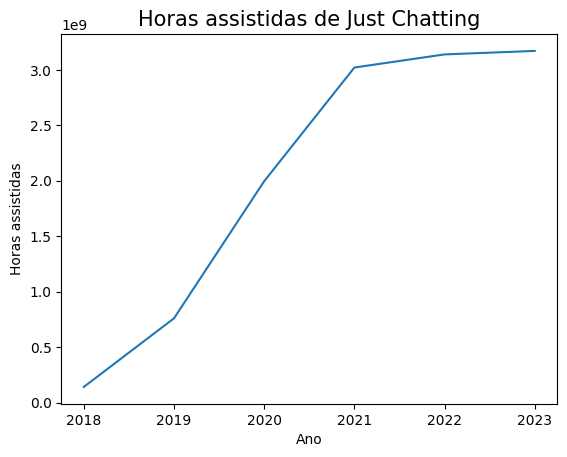

In [108]:
#dataframe com informações apenas do Just Chatting
df_just = data_games[data_games['jogo'] == 'Just Chatting']
ser_just_hours = df_just.groupby(['ano'])['horas_assistidas'].sum()
#para 2023 o mês de Janeiro será considerado como a média do ano
ser_just_hours[2023] = ser_just_hours[2023]*12
print(ser_just_hours)
#gráfico Horas assistidas de Just Chatting x ano
plt.plot(ser_just_hours.index, ser_just_hours.values)
plt.xlabel('Ano', size=10)
plt.ylabel('Horas assistidas', size=10)
plt.title('Horas assistidas de Just Chatting', size=15)

In [109]:
#Horas assistidas do Just Chatting (2018-2023)
horas_just = df_just['horas_assistidas'].sum()
#Total de horas assistidas no geral (2018-2023)
horas_total = sum(data.groupby(['ano'])['horas_assistidas'].sum()[2:])
#Razão de horas do just chatting em relação ao total de horas (2018-2023)
print(f'\nA razão é de {horas_just/horas_total:.4f}, o que corresponde a uma porcentagem de {(horas_just/horas_total)*100:.2f} %\n ')


A razão é de 0.1062, o que corresponde a uma porcentagem de 10.62 %
 


ano
2016          NaN
2017          NaN
2018     1.508153
2019     6.906534
2020    10.726575
2021    12.412927
2022    13.890819
2023    14.152020
Name: horas_assistidas, dtype: float64


Text(0.5, 1.0, 'Razão Percentual Entre o Just Chatting e o Total')

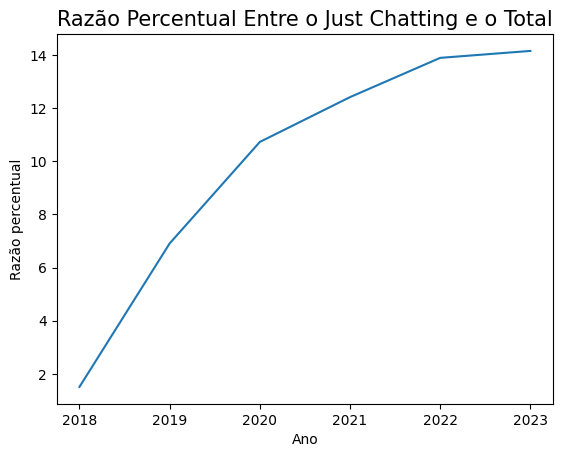

In [110]:
#Razão ano a ano em porcentagem
ser_just_ratio = (df_just.groupby(['ano'])['horas_assistidas'].sum())*100/(data.groupby(['ano'])['horas_assistidas'].sum())
print(ser_just_ratio)
#Gráfico da razão percentual do Just Chatting em relação ao total de horas assistidas (2018-2023)
plt.plot(ser_just_ratio.index, ser_just_ratio.values)
plt.xlabel('Ano', size=10)
plt.ylabel('Razão percentual', size=10)
plt.title('Razão Percentual Entre o Just Chatting e o Total', size=15)

### Análise de jogos

#### League of legends

In [111]:
#verificação da versão principal de League of legends
data_games[data_games['jogo'].str.contains('League of Legends') == True]['jogo'].value_counts()

League of Legends                         85
League of Legends: Wild Rift              28
Ruined King: A League of Legends Story     1
Name: jogo, dtype: int64

ano
2016    1035469850
2017    1022398595
2018     985380685
2019    1118435546
2020    1553536532
2021    1735661105
2022    1556699612
2023     126494155
Name: horas_assistidas, dtype: int32


Text(0.5, 1.0, 'Horas Assistidas de League of Legends')

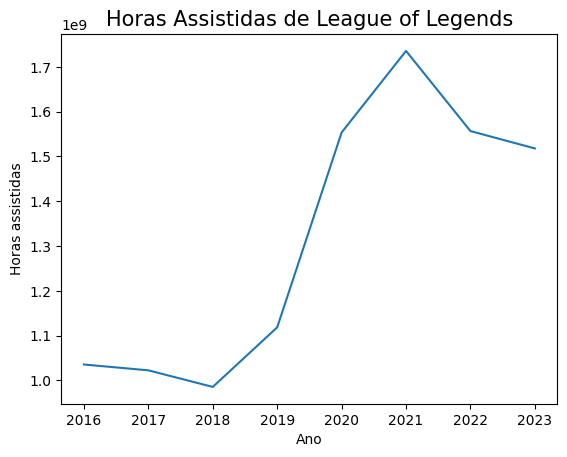

In [112]:
#criação de um dataframe com informações apenas de League of legends
df_lol = data_games[data_games['jogo'] == 'League of Legends']
#quantidade de horas assistidas em cada ano
ser_lol_hours = df_lol.groupby(['ano'])['horas_assistidas'].sum()
print(ser_lol_hours)
#para 2023 o mês de Janeiro será considerado como a média do ano
ser_lol_hours[2023] = ser_lol_hours[2023]*12
#gráfico Horas assistidas de League of legenda a cada ano
plt.plot(ser_lol_hours.index, ser_lol_hours.values)
plt.xlabel('Ano', size=10)
plt.ylabel('Horas assistidas', size=10)
plt.title('Horas Assistidas de League of Legends', size=15)

ano
2016    19.642783
2017    15.648362
2018    10.517087
2019    10.167405
2020     8.349216
2021     7.132163
2022     6.888521
2023     6.775399
Name: horas_assistidas, dtype: float64


Text(0.5, 1.0, 'Razão Percentual Entre League of Legends e o Total')

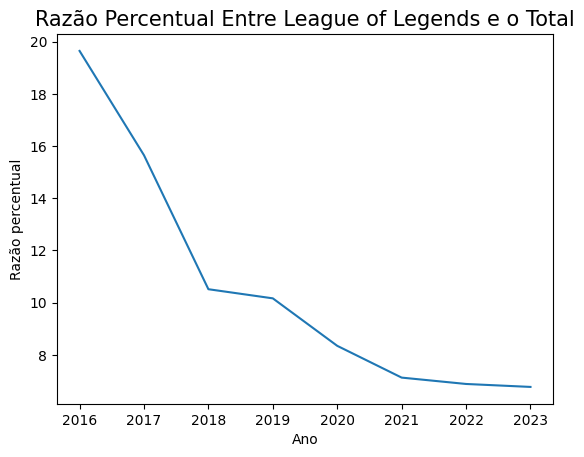

In [113]:
#comparação em relação às horas assistidas no total
ser_lol_ratio = ((df_lol.groupby(['ano'])['horas_assistidas'].sum())/(data.groupby(['ano'])['horas_assistidas'].sum()))*100
print(ser_lol_ratio)
#Gráfico da razão percentual do League of Legends em relação ao total de horas assistidas (2018-2023)
plt.plot(ser_lol_ratio.index, ser_lol_ratio.values)
plt.xlabel('Ano', size=10)
plt.ylabel('Razão percentual', size=10)
plt.title('Razão Percentual Entre League of Legends e o Total', size=15)

In [114]:
#Redução percentual no mercado da Twitch de 2016 para 2023
red = (1-(ser_lol_ratio[2023]/ser_lol_ratio[2016]))*100
print(f'Redução percentual de {red:.2f} %')

Redução percentual de 65.51 %


In [115]:
#comparação em relação às horas assistidas no total desconsiderando-se o Just Chatting
((df_lol.groupby(['ano'])['horas_assistidas'].sum())/(data.groupby(['ano'])['horas_assistidas'].sum() - df_just.groupby(['ano'])['horas_assistidas'].sum()))*100

ano
2016          NaN
2017          NaN
2018    10.678130
2019    10.921717
2020     9.352410
2021     8.142940
2022     7.999752
2023     7.892322
Name: horas_assistidas, dtype: float64

#### Dota

In [116]:
#verificação da versão principal de dota
data_games[data_games['jogo'].str.contains('Dota') == True]['jogo'].value_counts()

Dota 2             85
Dota Underlords     9
Name: jogo, dtype: int64

ano
2016    496585969
2017    449879503
2018    472414819
2019    503022570
2020    497151335
2021    578484298
2022    532253215
2023     43317513
Name: horas_assistidas, dtype: int32


Text(0.5, 1.0, 'Horas Assistidas de Dota')

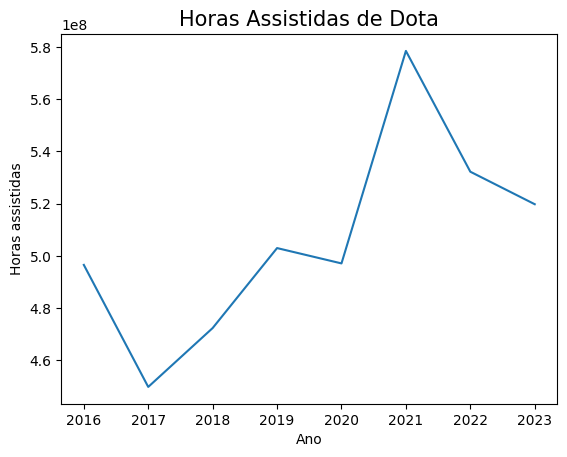

In [117]:
#criação de um dataframe com informações apenas de Dota 2
df_dota = data_games[data_games['jogo'] == 'Dota 2']
#quantidade de horas assistidas em cada ano
ser_dota_hours = df_dota.groupby(['ano'])['horas_assistidas'].sum()
print(ser_dota_hours)
#para 2023 o mês de Janeiro será considerado como a média do ano
ser_dota_hours[2023] = ser_dota_hours[2023]*12
#gráfico Horas assistidas de League of legenda a cada ano
plt.plot(ser_dota_hours.index, ser_dota_hours.values)
plt.xlabel('Ano', size=10)
plt.ylabel('Horas assistidas', size=10)
plt.title('Horas Assistidas de Dota', size=15)

ano
2016    9.420197
2017    6.885649
2018    5.042141
2019    4.572846
2020    2.671855
2021    2.377102
2022    2.355263
2023    2.320213
Name: horas_assistidas, dtype: float64


Text(0.5, 1.0, 'Razão Percentual Entre Dota e o Total')

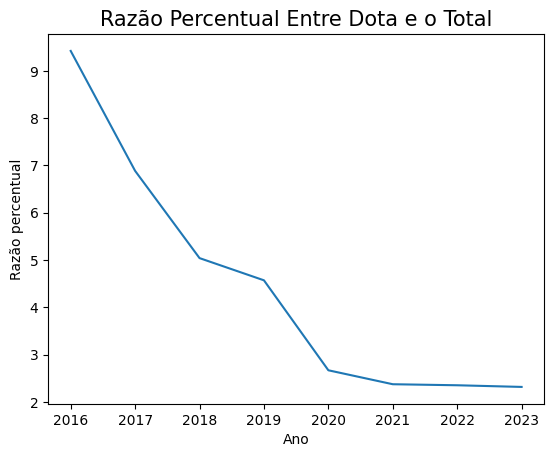

In [118]:
#comparação em relação às horas assistidas no total
ser_dota_ratio = ((df_dota.groupby(['ano'])['horas_assistidas'].sum())/(data.groupby(['ano'])['horas_assistidas'].sum()))*100
print(ser_dota_ratio)
#Gráfico da razão percentual do Dota em relação ao total de horas assistidas (2018-2023)
plt.plot(ser_dota_ratio.index, ser_dota_ratio.values)
plt.xlabel('Ano', size=10)
plt.ylabel('Razão percentual', size=10)
plt.title('Razão Percentual Entre Dota e o Total', size=15)

In [119]:
#Redução percentual no mercado da Twitch de 2016 para 2023
red = (1-(ser_dota_ratio[2023]/ser_dota_ratio[2016]))*100
print(f'Redução percentual de {red:.2f} %')

Redução percentual de 75.37 %


In [120]:
#comparação em relação às horas assistidas no total desconsiderando-se o Just Chatting
((df_dota.groupby(['ano'])['horas_assistidas'].sum())/(data.groupby(['ano'])['horas_assistidas'].sum() - df_just.groupby(['ano'])['horas_assistidas'].sum()))*100

ano
2016         NaN
2017         NaN
2018    5.119348
2019    4.912103
2020    2.992889
2021    2.713988
2022    2.735206
2023    2.702700
Name: horas_assistidas, dtype: float64

### Jogos Top 20 (Desconsiderando o Just Chatting)

In [121]:
#Dataframe com o top20 de todos os meses, considerando o Just Chatting
lista_rank = np.arange(1,21)
df_top20 = data_games[data_games['Rank'].isin(lista_rank)]
#Dataframe que identifica o Just Chatting no top20 para removê-lo e colocar um jogo no lugar
df_append = df_top20[df_top20['jogo'].isin(['Just Chatting'])].loc[ : , ['mes', 'ano']]
#Remoção do Just Chatting e acréscimo do jogo de rank 21 do respectivo mês
for tupla in df_append.itertuples():
    df_temp = data_games[(data_games['Rank'] == 21) & (data_games['mes'] == tupla[1]) & (data_games['ano'] == tupla[2])]
    df_top20 = pd.concat([df_top20, df_temp])
    df_top20 = df_top20.drop(tupla[0])
#Dataframe com o top20 de todos os meses, desconsiderando o Just Chatting
df_top20

,Rank,jogo,mes,ano,horas_assistidas,horas_transmitidas,pico_de_visualizacoes,pico_de_canais,Streamers,media_de_espectadores,media_canais,media_de_proporção_de_espectadores
0,1,League of Legends,1,2016,94377226,1362044,530270,2903,129172,127021.0,1833.0,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105,372654,2197,120849,64378.0,1117.0,57.62
2,3,Dota 2,1,2016,45185893,433397,315083,1100,44074,60815.0,583.0,104.26
3,4,Hearthstone,1,2016,39936159,235903,131357,517,36170,53749.0,317.0,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578,71639,3620,214054,21740.0,1549.0,14.03
...,...,...,...,...,...,...,...,...,...,...,...,...
16020,21,NBA 2K23,9,2022,16458374,829449,352152,7180,97382,22890.0,1153.0,19.84
16220,21,Special Events,10,2022,15015700,52937,1045462,781,13223,20209.0,71.0,283.65
16420,21,Teamfight Tactics,11,2022,14417524,173705,102291,586,26384,20052.0,241.0,83.00
16620,21,Dead by Daylight,12,2022,16803010,1048716,56226,2910,103748,22615.0,1411.0,16.02


ano
2016     3919168020
2017     4497288304
2018     6315112988
2019     6785334250
2020    10618343719
2021    12971194955
2022    11490627552
2023      937276137
Name: horas_assistidas, dtype: int64


Text(0.5, 1.0, 'Horas Assistidas de Top 20 jogos')

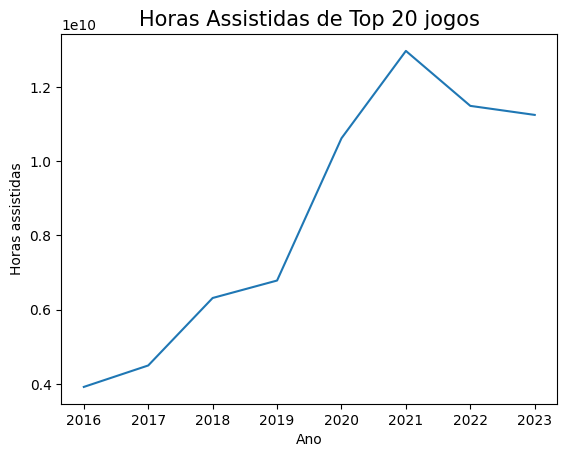

In [122]:
#Quantidade de horas assistidas por ano (top20 jogos)
ser_top20_hours = df_top20.groupby(['ano'])['horas_assistidas'].sum()
print(ser_top20_hours)
#para 2023 o mês de Janeiro será considerado como a média do ano
ser_top20_hours[2023] = ser_top20_hours[2023]*12
#gráfico Horas assistidas de Top20 a cada ano
plt.plot(ser_top20_hours.index, ser_top20_hours.values)
plt.xlabel('Ano', size=10)
plt.ylabel('Horas assistidas', size=10)
plt.title('Horas Assistidas de Top 20 jogos', size=15)

ano
2016    74.346313
2017    68.833425
2018    67.401966
2019    61.683697
2020    57.066473
2021    53.301114
2022    50.846950
2023    50.203266
Name: horas_assistidas, dtype: float64


Text(0.5, 1.0, 'Razão Percentual Entre os Top 20 jogos e o Total')

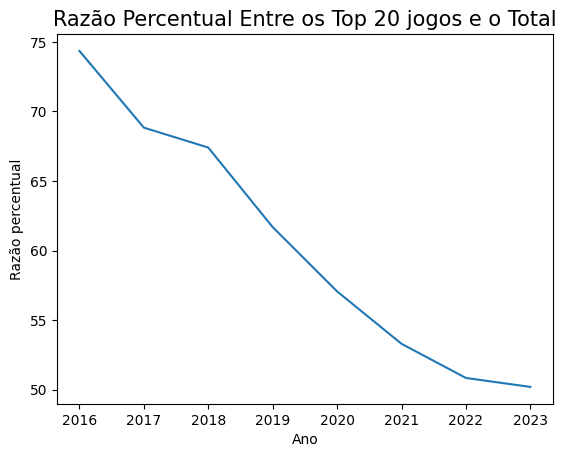

In [123]:
#comparação em relação às horas assistidas no total
ser_top20_ratio = ((df_top20.groupby(['ano'])['horas_assistidas'].sum())/(data.groupby(['ano'])['horas_assistidas'].sum()))*100
print(ser_top20_ratio)
#Gráfico da razão percentual do top20 jogos em relação ao total de horas assistidas (2016-2023)
plt.plot(ser_top20_ratio.index, ser_top20_ratio.values)
plt.xlabel('Ano', size=10)
plt.ylabel('Razão percentual', size=10)
plt.title('Razão Percentual Entre os Top 20 jogos e o Total', size=15)

In [124]:
#Redução percentual no mercado da Twitch de 2016 para 2023 (top20)
red = (1-(ser_top20_ratio[2023]/ser_top20_ratio[2016]))*100
print(f'Redução percentual de {red:.2f} %')

Redução percentual de 32.47 %


In [133]:
#Quantidade de horas assistidas separadas por ano (top20 jogos)
horas_top20 = df_top20['horas_assistidas'].sum()
#Quantidade de horas assistidas total (2016-2023)
horas_total = data['horas_assistidas'].sum()
#Razão de horas do top20 em relação ao total de horas
print(f'\nA razão é de {horas_top20/horas_total:.4f}, o que corresponde a uma porcentagem de {(horas_top20/horas_total)*100:.2f} %\n ')


A razão é de 0.5778, o que corresponde a uma porcentagem de 57.78 %
 


# Igor análises

Agrupando por ano, filtrando o numero de vezes que os jogos apareceram em top 20 e selecionando os que aparecem todos os anos e os que so apareceram 1 vez.

In [125]:
num_anos = data_games['ano'].nunique()
game_top20 = data_games.groupby('ano').head(20)['jogo'].value_counts()
i = 0
top_all_years = []
top_one_year = []
for vezes in game_top20:
    if(vezes == num_anos):
        top_all_years.append(game_top20.index[i])
    elif(vezes == 1):
        top_one_year.append(game_top20.index[i])
    i+=1
num_all_years = len(top_all_years)
num_one_years = len(top_one_year)

prop = num_one_years/num_all_years


In [126]:
game_top20.head(5)

League of Legends                   8
Dota 2                              8
World of Warcraft                   8
Counter-Strike: Global Offensive    8
Hearthstone                         7
Name: jogo, dtype: int64

In [127]:
game_top20.tail(10)

Creative                     1
IRL                          1
FIFA 18                      1
Slay the Spire               1
VRChat                       1
Subnautica                   1
FIFA 19                      1
Call of Duty: Black Ops 4    1
Resident Evil 2              1
Virtual Casino               1
Name: jogo, dtype: int64

In [128]:
# Jogos que aparecem no top 20 todos os anos
print('Jogos que aparecem no top 20 todos os anos:')
for i in range(len(top_all_years)):
    print(top_all_years[i])
print(f'Total: {len(top_all_years)}')
# Jogos que aparecem no top 20 só uma vez
print('\nJogos que aparecem no top 20 só uma vez:')
for i in range(len(top_one_year)):
    print(top_one_year[i])
print(f'Total: {len(top_one_year)}')
# Proporção de jogos que aparecem apenas uma vez vs que sempre aparecem
print('Proporção de jogos que aparecem apenas uma vez vs que sempre aparecem:')

print(f'{num_one_years}/{num_all_years} = {prop}')


Jogos que aparecem no top 20 todos os anos:
League of Legends
Dota 2
World of Warcraft
Counter-Strike: Global Offensive
Total: 4

Jogos que aparecem no top 20 só uma vez:
DRAGON BALL Z: KAKAROT
FIFA 20
Sports
FIFA 23
FIFA 21
Among Us
Rocket League
Overwatch 2
PokÃ©mon Legends: Arceus
FIFA 22
They Are Billions
Super Smash Bros. Ultimate
Atlas
Call of Duty: Black Ops III
FIFA 16
Diablo III
Blade & Soul
Tom Clancy's The Division
Resident Evil 7 biohazard
FIFA 17
For Honor
Creative
IRL
FIFA 18
Slay the Spire
VRChat
Subnautica
FIFA 19
Call of Duty: Black Ops 4
Resident Evil 2
Virtual Casino
Total: 31
Proporção de jogos que aparecem apenas uma vez vs que sempre aparecem:
31/4 = 7.75


Ou seja para cada 1 jogo que esteve sempre no top 20 nos ultimos 7/8 anos existe quase 8 jogos que so duram 1 ano no top 20, onde podemos encontrar um "monopólio" no mercado de streams onde 3 dos 4 jogos que se mantem são jogos competitivos onde existe um forte mercado de E-sports

In [129]:
hr_ass_per_espec = data_games.groupby('jogo', sort = False)['horas_assistidas','media_de_espectadores'].sum().head(20)

print((hr_ass_per_espec['horas_assistidas']/hr_ass_per_espec['media_de_espectadores'])/85)

jogo
League of Legends                   8.582378
Counter-Strike: Global Offensive    8.570357
Dota 2                              8.589292
Hearthstone                         8.585236
Call of Duty: Black Ops III         8.574619
Minecraft                           8.589410
World of Warcraft                   8.593496
Z1: Battle Royale                   8.561753
Talk Shows & Podcasts               8.578025
FIFA 16                             8.600308
StarCraft II                        8.574036
Diablo III                          8.596917
Destiny                             8.574869
Blade & Soul                        8.578688
World of Tanks                      8.586471
Tom Clancy's Rainbow Six Siege      8.548454
RuneScape                           8.579671
Tom Clancy's The Division           8.621903
Grand Theft Auto V                  8.585371
SMITE                               8.579848
dtype: float64


C:\Users\hyggo\AppData\Local\Temp\ipykernel_21192\641715188.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  hr_ass_per_espec = data_games.groupby('jogo', sort = False)['horas_assistidas','media_de_espectadores'].sum().head(20)


Conseguimos ver que a média de horas assistidas por espectador não se altera muito de jogo para jogo.

Análise visual de picos de visualizações dos jogos mais vistos em todos anos

In [130]:
peak_view_top_games = data_games.loc[:,['jogo','mes','ano','pico_de_visualizacoes']]
peak_view_top_games = peak_view_top_games.loc[peak_view_top_games['jogo'].isin(top_all_years)]
peak_view_top_games = peak_view_top_games.groupby('ano')


In [131]:
peak_view_top_games = peak_view_top_games.get_group(2022)

array([<Axes: xlabel='mes'>, <Axes: xlabel='mes'>, <Axes: xlabel='mes'>,
       <Axes: xlabel='mes'>], dtype=object)

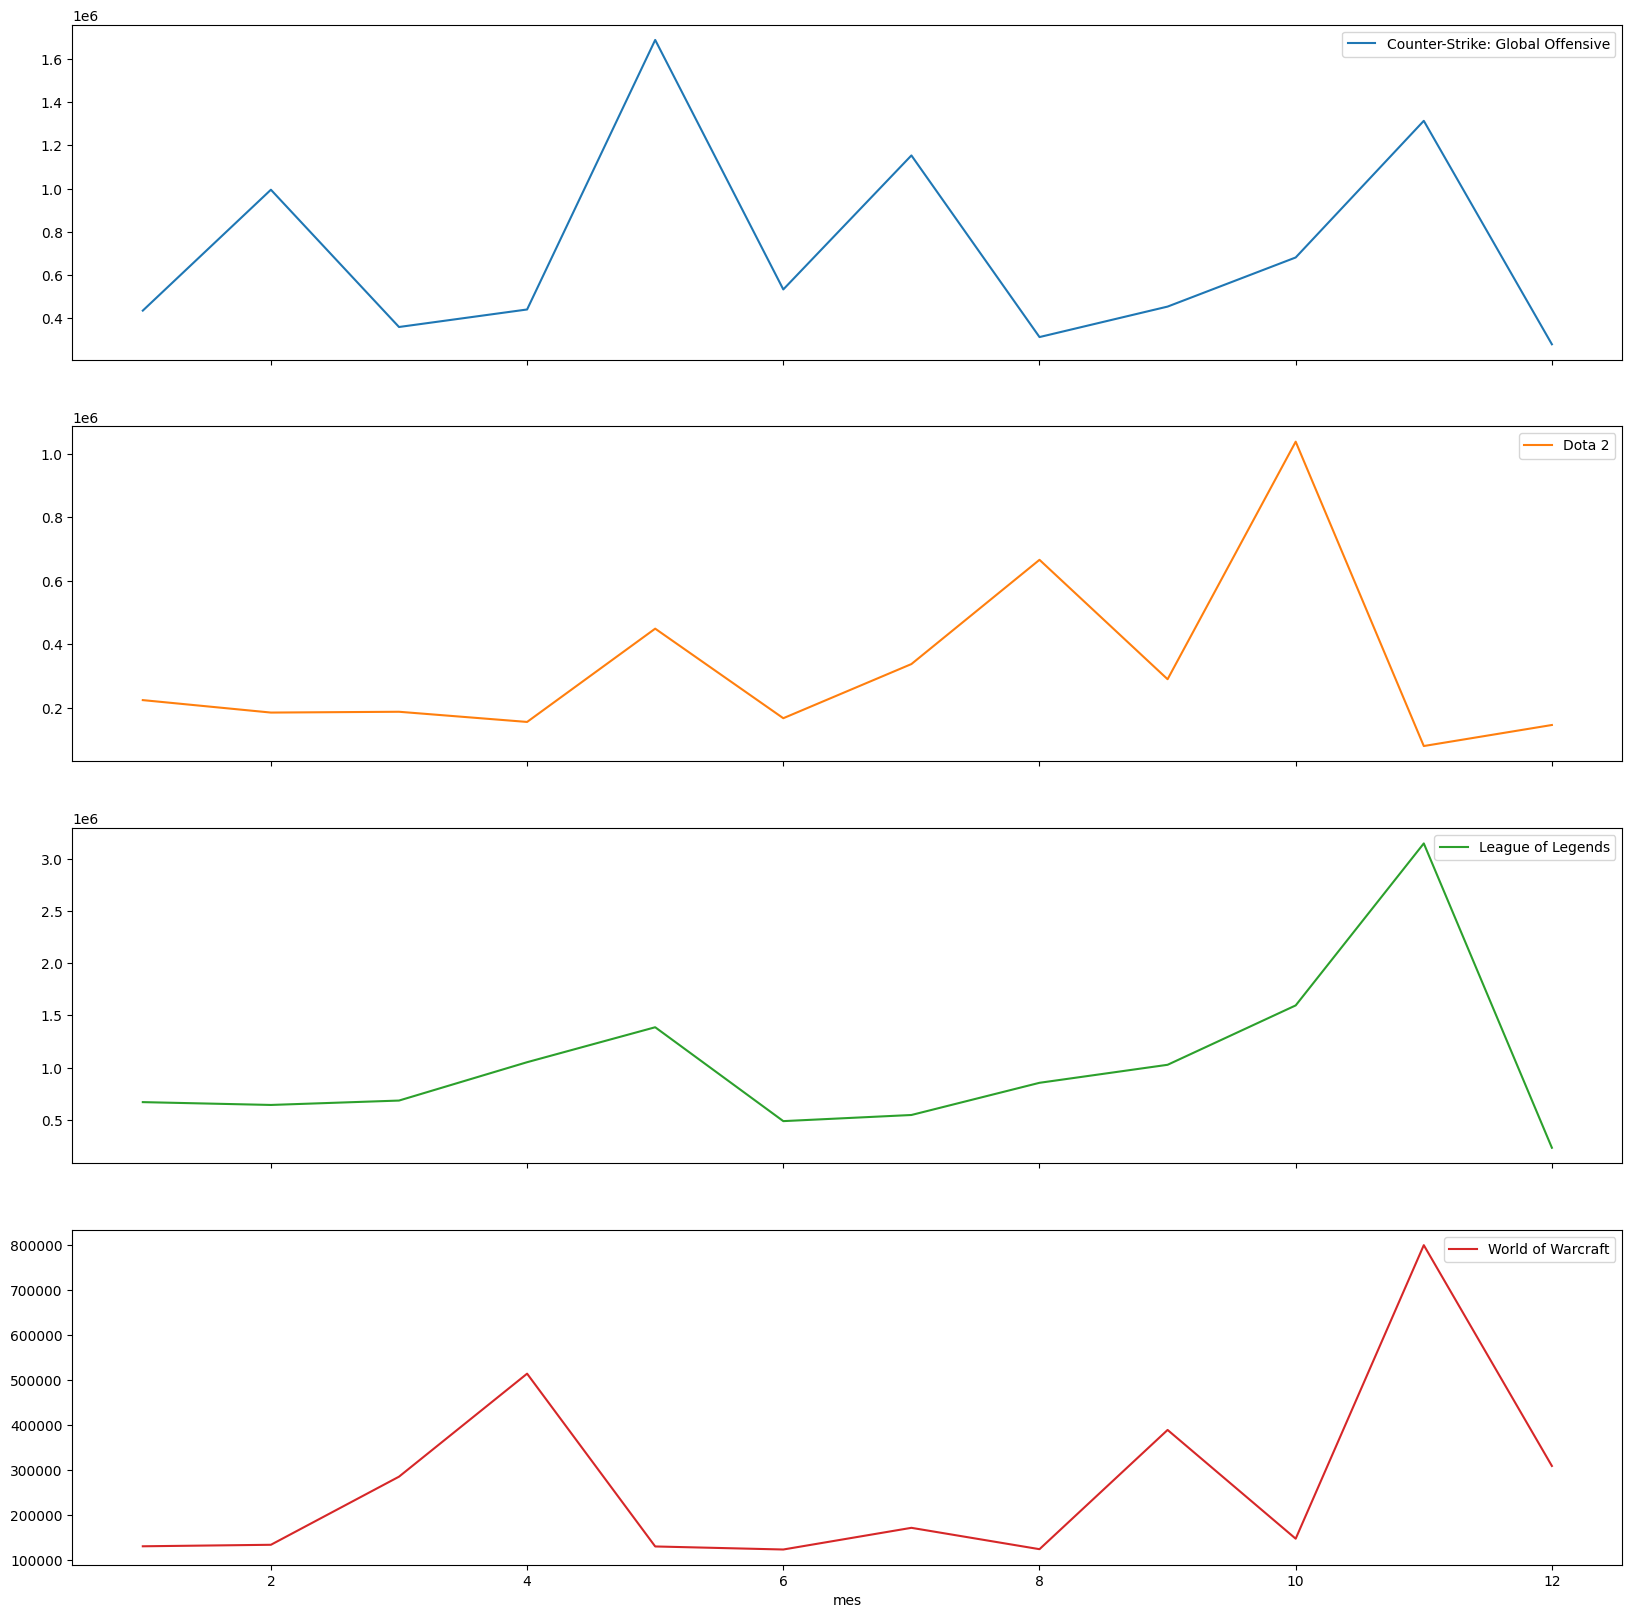

In [132]:
pd.pivot_table(peak_view_top_games.reset_index(),
               index='mes', columns='jogo', values='pico_de_visualizacoes'
              ).plot(subplots=True,figsize=(20, 20))

Conseguimos perceber que todos tem uma alta bem parecida.